In [ ]:
import findspark
findspark.init()

In [1]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Qia", 21, "Dokter", "Memasak", "Perempuan"),
        ("Zara", 22, "Pramugari", "Bernyanyi", "Perempuan"),
        ("Zalora", 23, "Guru", "Membaca", "Perempuan"),
        ("Qalista", 24, "Perawat", "Berkebun", "Perempuan")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

24/08/28 01:58:34 WARN Utils: Your hostname, codespaces-26d3df resolves to a loopback address: 127.0.0.1; using 10.0.0.156 instead (on interface eth0)
24/08/28 01:58:34 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/28 01:58:35 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+-------+----+---------+---------+---------+
|   Nama|Usia|Pekerjaan|     Hobi|   Gender|
+-------+----+---------+---------+---------+
|    Qia|  21|   Dokter|  Memasak|Perempuan|
|   Zara|  22|Pramugari|Bernyanyi|Perempuan|
| Zalora|  23|     Guru|  Membaca|Perempuan|
|Qalista|  24|  Perawat| Berkebun|Perempuan|
+-------+----+---------+---------+---------+



24/08/28 01:58:53 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [2]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Qia", 21), ("Zara", 22), ("zalora", 23), ("Qalista", 24)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+-------+----+
|   Nama|Usia|
+-------+----+
|    Qia|  21|
|   Zara|  22|
| zalora|  23|
|Qalista|  24|
+-------+----+

+----+----+
|Nama|Usia|
+----+----+
+----+----+

+---------+
|avg(Usia)|
+---------+
|     22.5|
+---------+

+-------+----+
|   Nama|Usia|
+-------+----+
|Qalista|  24|
| zalora|  23|
|   Zara|  22|
|    Qia|  21|
+-------+----+



In [4]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Qia", "Zara", "Zalora", "Qalista"], "Usia": [21, 22, 23, 24]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan kolom baru
gender = ["Perempuan", "Perempuan", "Perempuan", "Perempuan"]
df_pandas['Gender'] = gender

print("DataFrame:")
print(df_pandas)

# Filtering usia
filtered_df = df_pandas[df_pandas['Usia'] > 20]

print("\nUsia > 20:")
print(filtered_df)
      

# Menampilkan DataFrame Pandas
df_pandas

DataFrame:
      Nama  Usia     Gender
0      Qia    21  Perempuan
1     Zara    22  Perempuan
2   Zalora    23  Perempuan
3  Qalista    24  Perempuan

Usia > 20:
      Nama  Usia     Gender
0      Qia    21  Perempuan
1     Zara    22  Perempuan
2   Zalora    23  Perempuan
3  Qalista    24  Perempuan


,Nama,Usia,Gender
0,Qia,21,Perempuan
1,Zara,22,Perempuan
2,Zalora,23,Perempuan
3,Qalista,24,Perempuan


      Nama  Usia  Pekerjaan
0      Qia    21     Dokter
1     Zara    22  Pramugari
2   Zalora    23       Guru
3  Qalista    24    Perawat
            Usia
count   4.000000
mean   22.500000
std     1.290994
min    21.000000
25%    21.750000
50%    22.500000
75%    23.250000
max    24.000000


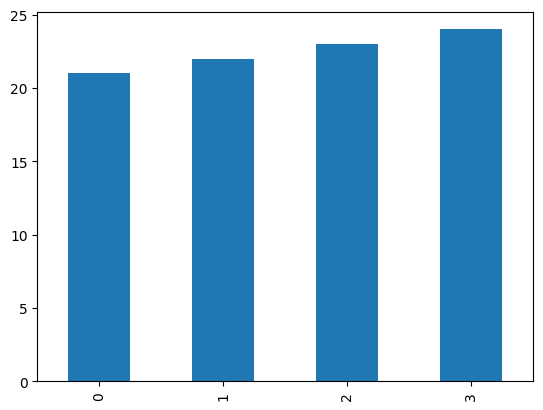

In [5]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Qia", "Zara", "Zalora", "Qalista"], "Usia": [21, 22, 23, 24]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Qia", "Zara", "Zalora", "Qalista"], "Pekerjaan": ["Dokter", "Pramugari", "Guru", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

In [6]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

+-------+----+
|   Nama|Usia|
+-------+----+
|    Qia|  21|
|   Zara|  22|
| Zalora|  23|
|Qalista|  24|
+-------+----+



(      Nama  Usia
 0      Qia    21
 1     Zara    22
 2   zalora    23
 3  Qalista    24,
 None)

In [7]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()


+-------+----+
|   Nama|Usia|
+-------+----+
|    Qia|  21|
|   Zara|  22|
| Zalora|  23|
|Qalista|  24|
+-------+----+



(      Nama  Usia
 0      Qia    21
 1     Zara    22
 2   zalora    23
 3  Qalista    24,
 None)